In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load data

Data is stored in a 4D array:

- First index is the map ID
- Second index is `[prob_obstacle, prob_explored, agent_loc, path]`
- Final 2 dims are the 2d space

In [2]:
data = np.load("data/sample_maps.npy")

In [3]:
map1, map2, map3 = data

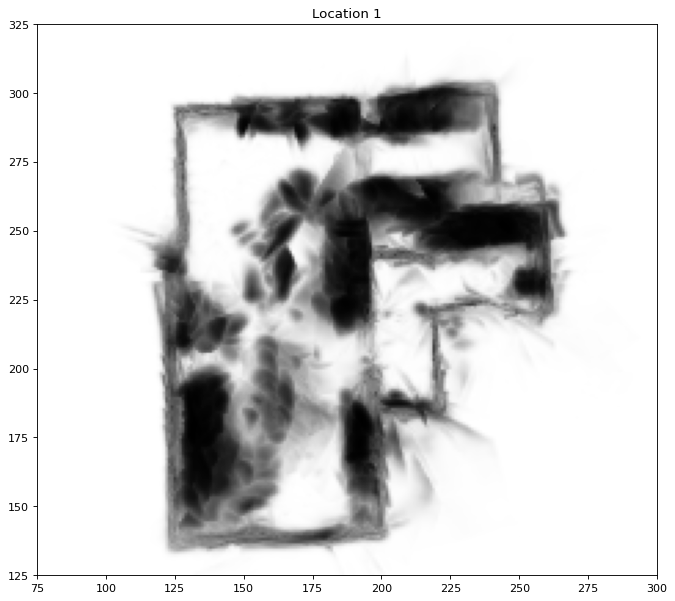

In [4]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(map1[0], cmap='Greys')
plt.xlim(75, 300)
plt.ylim(125, 325)
plt.title("Location 1")
plt.show()

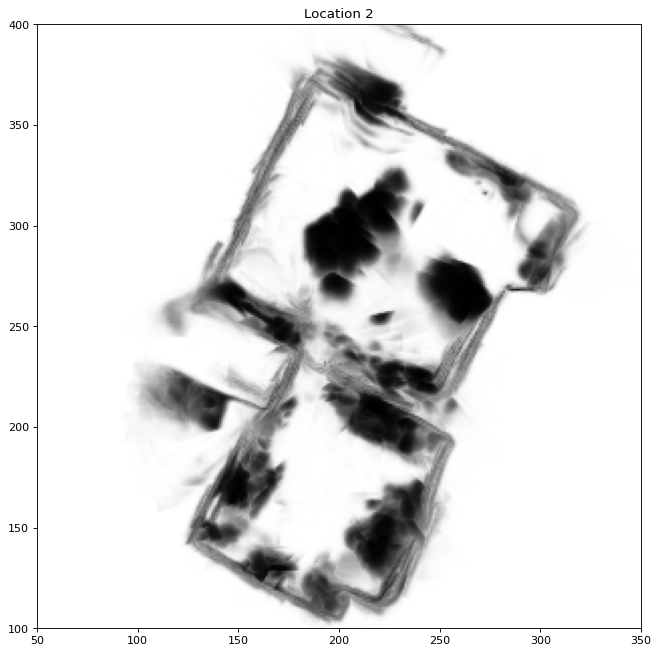

In [5]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(map2[0], cmap='Greys')
plt.xlim(50, 350)
plt.ylim(100, 400)
plt.title("Location 2")
plt.show()

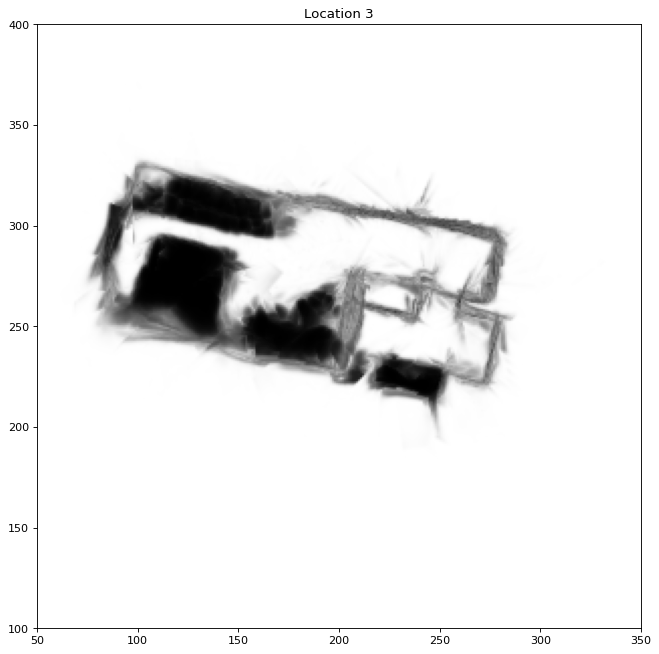

In [6]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(map3[0], cmap='Greys')
plt.xlim(50, 350)
plt.ylim(100, 400)
plt.title("Location 3")
plt.show()

# Clip image

Clip and crop the image down to make it more wieldy

In [7]:
# map1_clipped = map1[0].copy()
# map1_clipped[map1_clipped < 0.5] = 0

In [8]:
# clip arbitrary threshold
clipped = np.zeros(map1[0].shape)
clipped[map1[0] > 0.5] = 1 

In [9]:
# crop to view
cropped = clipped[125:325, 75:275]

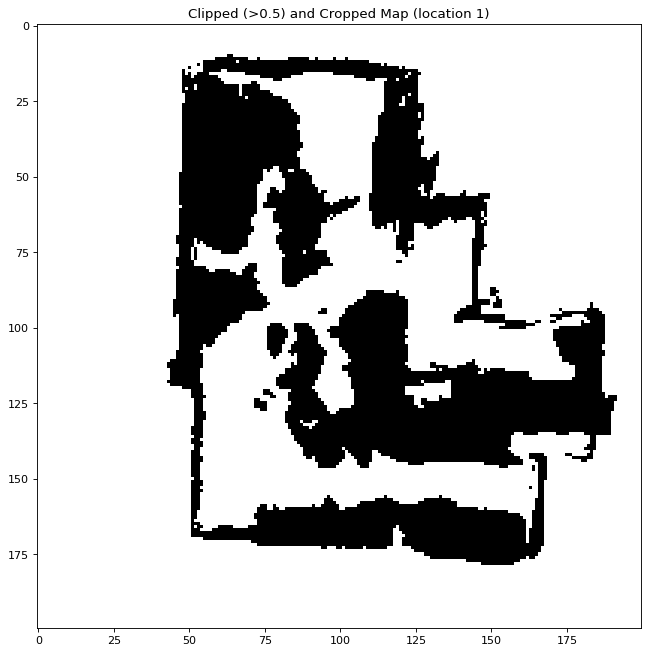

In [10]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(cropped, cmap='Greys')
plt.title("Clipped (>0.5) and Cropped Map (location 1)")
plt.show()

# NetworkX time

In [11]:
# Make graph
graph = nx.lattice.grid_graph(cropped.shape) # (cropped.shape[0] - 1, cropped.shape[1] - 1))

In [12]:
walls = np.argwhere(cropped > 0)
for w in walls:
    graph.remove_node(tuple(w))

# Example start and finish 
start = (100, 25)  # red
end = (65, 125)    # blue# Visualize Graph

Note that the networkx gridgraph only has up/down/left/right connections, NO diagonal!

In [13]:
# Example start and finish 
start = (100, 25)  # red
end = (65, 125)    # blue

In [14]:
nodes = [((i[1], i[0])) for i in graph.nodes.keys()]
nodes = np.array(nodes)
graph_img = np.zeros(cropped.shape)
graph_img[[*nodes.T]] = 1

<ipython-input-14-926ed25884a1>:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  graph_img[[*nodes.T]] = 1


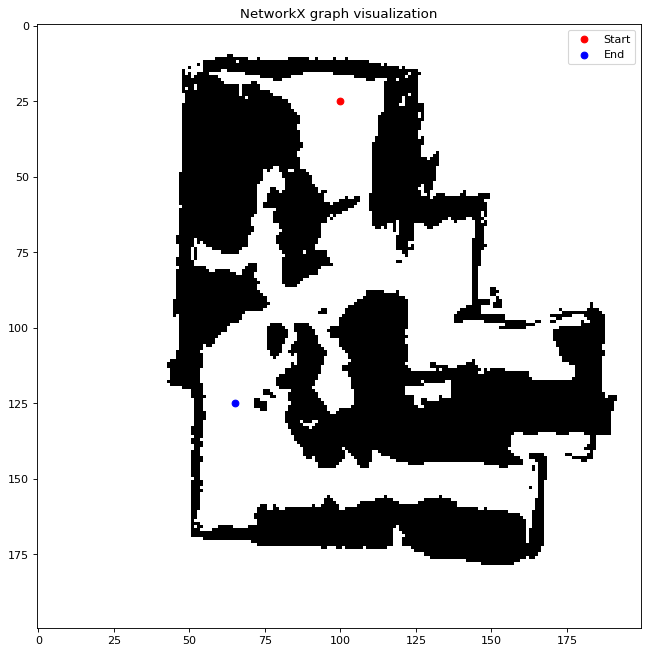

In [15]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(graph_img.T, cmap='Greys_r')
plt.scatter(*start, color='red', marker='o', label="Start")
plt.scatter(*end,  color='blue', marker='o', label="End")
plt.legend()
plt.title("NetworkX graph visualization")
plt.show()

# Compute Shortest Path analytically

In [16]:
spl = nx.shortest_path(graph, start[::-1], end[::-1])

In [17]:
x = [i[0] for i in spl]
y = [i[1] for i in spl]

## Visualize Shortest Path

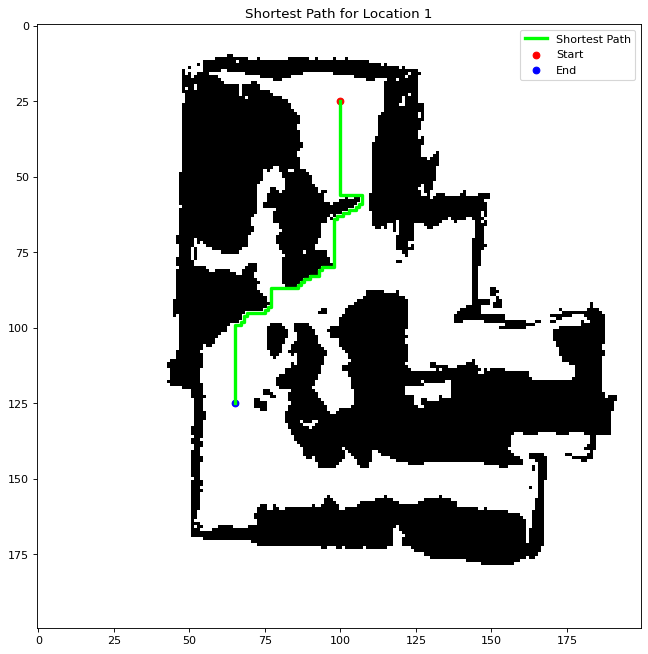

In [18]:
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(graph_img.T, cmap='Greys_r')

plt.plot(y, x, color='lime', linewidth=3, label="Shortest Path")
plt.scatter(*start, color='red', marker='o', label="Start")
plt.scatter(*end,  color='blue', marker='o', label="End")
plt.legend()
plt.title("Shortest Path for Location 1")
plt.show()